# NOTES:

CLUSTERING IS ALSO CALLED SEGMENTATION OF DATA. IT IS A UNSUPERVISED ML TECHNIQUE. 
let's say if you don't have any class or label or category in your data, what you're trying to find out some groups which are different from each other in the data

During clustering one input feature have larger value ranges and one input feature have smaller value ranges than clustering algorithm will favour that algorithm with larger value ranges.

Therefore "scaler = MinMaxScaler()" is used to standardize the data ranges. Data range between 0 to 1.

# HOMEWORK:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score #for clustering. as we had r-sqaure for regression.
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("McDonaldsMenu.csv");

In [3]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
# 1. Need to clean the data. Remove columns Category and Item for clustering purpose.
df1 = df.drop(['Category', 'Item'],axis = 1);

We have removed the column Category and Item because we want to perform clustering techniques to predict them. Since clustering is an unsupervised learning model therefore we just provide it with numerical data to give us the clusters.

In [5]:
# 2. You may drop column Serving Size. If not, then you need to clean the values and get oz or g values and then remove the units.
d = np.array(df1['Serving Size'])
for i in range(0, len(d)):
    d[i] = float(d[i].split()[0])  # taking oz values
df1['Serving Size'] = d;
df1['Serving Size'] = df1['Serving Size'].astype(float)

In [6]:
df1.dtypes

Serving Size                     float64
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [7]:
df1.head()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8,300,120,13.0,20,5.0,25,0.0,260,87,...,31,10,4,17,3,17,10,0,25,15
1,4.8,250,70,8.0,12,3.0,15,0.0,25,8,...,30,10,4,17,3,18,6,0,25,8
2,3.9,370,200,23.0,35,8.0,42,0.0,45,15,...,29,10,4,17,2,14,8,0,25,10
3,5.7,450,250,28.0,43,10.0,52,0.0,285,95,...,30,10,4,17,2,21,15,0,30,15
4,5.7,400,210,23.0,35,8.0,42,0.0,50,16,...,30,10,4,17,2,21,6,0,25,10


I have filterd the Serving size col and taken its oz values. I have to convert it into float so that algorithm can process it.

In [8]:
# 3. Scale (normalize) the data before clustering.
X = df1
scaler = MinMaxScaler() # normallizing the data
# transform data
XS = scaler.fit_transform(X)
# XS.head()
XS[1:6]
# data range between 0 to 1

array([[0.12258065, 0.13297872, 0.06603774, 0.06779661, 0.06593407,
        0.15      , 0.14705882, 0.        , 0.04347826, 0.04166667,
        0.21388889, 0.21333333, 0.21276596, 0.21276596, 0.57142857,
        0.60714286, 0.0234375 , 0.20689655, 0.03529412, 0.        ,
        0.35714286, 0.2       ],
       [0.09354839, 0.19680851, 0.18867925, 0.19491525, 0.19230769,
        0.4       , 0.41176471, 0.        , 0.07826087, 0.078125  ,
        0.21666667, 0.22      , 0.20567376, 0.21276596, 0.57142857,
        0.60714286, 0.015625  , 0.16091954, 0.04705882, 0.        ,
        0.35714286, 0.25      ],
       [0.1516129 , 0.2393617 , 0.23584906, 0.23728814, 0.23626374,
        0.5       , 0.50980392, 0.        , 0.49565217, 0.49479167,
        0.23888889, 0.24      , 0.21276596, 0.21276596, 0.57142857,
        0.60714286, 0.015625  , 0.24137931, 0.08823529, 0.        ,
        0.42857143, 0.375     ],
       [0.1516129 , 0.21276596, 0.19811321, 0.19491525, 0.19230769,
        0.4      

Through this step we have scaled/ normalized our data between the values 0 to 1. This was necessary because all of our columns had wide variety of data ranges among themselves. If not scaled, the algorithm will consider the columns with larger data range. Hence our results would be incorrect.

In [9]:
# Generate WSS (Knee Plot) to find optimal number of clusters. You can also plot
# Silhouette Coefficient plot to support your answer

#Finding the optimum number of clusters for k-means clustering
wss = [] #which numnber is the best number of cluster

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 99) #Kmeans algowithm, building a model
    kmeans.fit(XS) # fitting that model
    wss.append(kmeans.inertia_)
    
# kmeans calculate the centerroid of every cluster,  Centeroid is the main center  data point of the cluster.
# And when there is no more change in the position of the of the centroid, then the algorithm stop. Max iteration is the limit of iteration.
# random state helps in keeping the data points consistent
# so for every number of cluster you would have a wss. Among which it will identify the best one. 

C:\Users\NCS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NCS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NCS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NCS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

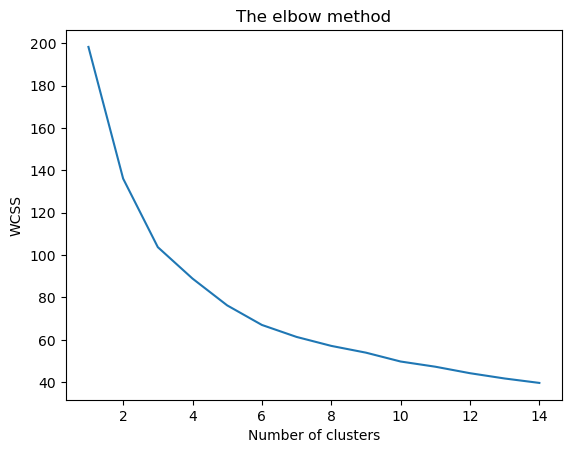

In [10]:
# Elbow is the point where we have the optimal number of roots of the data. That is after which our WCSS become stable
# In our case its number of clusters = 3. So optimal number of clusters = 3

plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

optimal number of clusters can be found by seeing the elbow grapgh. It seems like 4 is the point after which the graph stops drastically decreasing. Therefore our optimal number of clusters are 4.

In [25]:
# 5. Perform K-Means clustering again with optimal number of clusters.

kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 99) #??
Y = kmeans.fit_predict(XS) # predict will give me the cluster label to every row

C:\Users\NCS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0])

In [27]:
score = silhouette_score(XS, kmeans.labels_, metric='euclidean') #kmeans.labels_ is the Y
score # 1 is very good clustering score and -1 is very bad. 0 means all your groups or clusters are overlapped with each other.
# Ideally we want all our clusters to be far apart from each other. anything above 0.2.

0.3414108406186651

We have perfomed clustering. And got 0.341 as clustering score. Since it is above 0.3 therefore we can accept out number of clusters with confidence.

In [28]:
X.head()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8,300,120,13.0,20,5.0,25,0.0,260,87,...,31,10,4,17,3,17,10,0,25,15
1,4.8,250,70,8.0,12,3.0,15,0.0,25,8,...,30,10,4,17,3,18,6,0,25,8
2,3.9,370,200,23.0,35,8.0,42,0.0,45,15,...,29,10,4,17,2,14,8,0,25,10
3,5.7,450,250,28.0,43,10.0,52,0.0,285,95,...,30,10,4,17,2,21,15,0,30,15
4,5.7,400,210,23.0,35,8.0,42,0.0,50,16,...,30,10,4,17,2,21,6,0,25,10


Text(0.5, 1.0, 'The dataset post clustering')

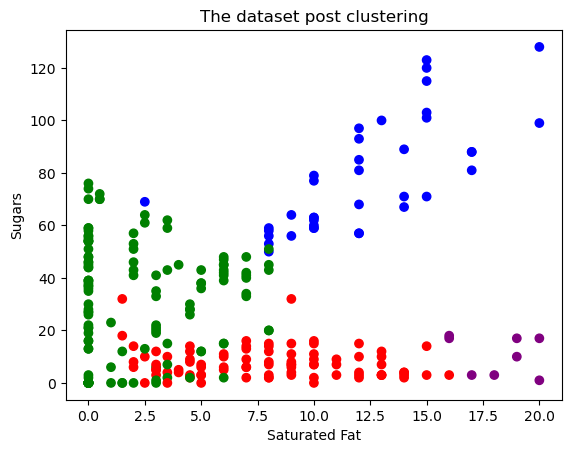

In [38]:
# 6. Visualize the clustering results.

#After the clustering
#adding the colors
color2=np.array(['green','red','blue', 'purple'])
plt.scatter(x=X['Saturated Fat'],y=X['Sugars'],c=color2[kmeans.labels_])
plt.xlabel('Saturated Fat')
plt.ylabel('Sugars')
plt.title("The dataset post clustering")

We can visualise our clustering results through the above plot. We have taken Saturated Fats as independent variable and Sugars as dependent variable. And based on that we can see that our clusters are seperated from each other, which symbolizes precision and accuracy in our clustering. While green and red cluster overlaps a little, which suggest some amount of error in our clustering as well. But we are sure that these are the optimal number of clusters that we could predict.

In [40]:
# 7. Use cluster labels to your original dataset to create cluster specific data frames.

C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]
C4 = X.iloc[Y == 3, :]

I have created the clustered-dataframe from the Y array which had values from 0 to 3. Each cluster now has its orignal value from the data set instead of the normalised value. We can hence use these clusters to generate meaningfull insights

In [ ]:
# 8. Generate at least 3 insights from your clustering results to show unique and interesting features for each cluster. Discuss your findings.

In [41]:
C1.describe()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,15.323256,199.767442,36.162791,4.093023,6.310078,2.217054,10.930233,0.0,13.643411,4.689922,...,35.395349,11.813953,0.751938,2.922481,30.542636,5.930233,7.147287,8.449612,16.961240,1.790698
std,7.586331,111.149640,41.238216,4.607555,7.073055,2.597960,12.670824,0.0,13.675250,4.701726,...,21.454319,7.181538,0.910280,3.606878,21.553352,5.484618,8.699947,32.431650,17.336019,2.754753
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,21.000000,7.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,210.000000,20.000000,2.000000,3.000000,1.000000,4.000000,0.0,10.000000,3.000000,...,38.000000,13.000000,1.000000,3.000000,35.000000,4.000000,4.000000,0.000000,8.000000,0.000000
75%,20.000000,280.000000,70.000000,8.000000,13.000000,4.500000,22.000000,0.0,25.000000,9.000000,...,50.000000,17.000000,1.000000,5.000000,46.000000,10.000000,10.000000,0.000000,30.000000,2.000000
max,32.000000,410.000000,160.000000,18.000000,27.000000,8.000000,39.000000,0.0,45.000000,14.000000,...,79.000000,26.000000,5.000000,19.000000,76.000000,17.000000,50.000000,240.000000,50.000000,15.000000


In [43]:
C2.describe()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,7.027059,460.941176,204.411765,22.711765,34.988235,7.888235,39.482353,0.247059,86.294118,28.752941,...,42.611765,14.188235,2.952941,11.823529,7.705882,21.788235,20.764706,12.941176,16.376471,15.929412
std,2.274621,136.326145,84.315916,9.429682,14.554899,3.803489,18.997877,0.466902,79.635154,26.579578,...,12.037732,4.019281,1.194291,4.964580,5.887484,9.324946,39.574116,21.924303,7.659380,5.628982
min,2.700000,140.000000,35.000000,4.000000,6.000000,1.500000,8.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,1.000000,5.000000,0.000000,2.000000,0.000000,0.000000,2.000000,4.000000
25%,5.300000,380.000000,150.000000,16.000000,25.000000,4.500000,22.000000,0.000000,35.000000,11.000000,...,34.000000,11.000000,2.000000,8.000000,3.000000,15.000000,2.000000,2.000000,10.000000,10.000000
50%,6.500000,460.000000,200.000000,23.000000,35.000000,8.000000,40.000000,0.000000,65.000000,21.000000,...,42.000000,14.000000,3.000000,12.000000,7.000000,21.000000,6.000000,8.000000,15.000000,15.000000
75%,8.500000,530.000000,250.000000,28.000000,43.000000,10.000000,52.000000,0.500000,90.000000,31.000000,...,50.000000,17.000000,3.000000,14.000000,11.000000,27.000000,10.000000,15.000000,20.000000,20.000000
max,12.300000,940.000000,530.000000,59.000000,91.000000,16.000000,78.000000,1.500000,300.000000,100.000000,...,68.000000,23.000000,7.000000,28.000000,32.000000,44.000000,170.000000,130.000000,30.000000,30.000000


In [44]:
C3.describe()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000
mean,16.897368,588.157895,177.763158,19.776316,30.421053,12.118421,60.421053,0.750000,63.026316,21.026316,...,89.552632,29.815789,0.894737,3.947368,78.131579,13.631579,19.210526,0.0,44.736842,4.500000
std,4.184753,150.725368,52.770505,5.817840,8.967303,3.638076,18.601993,0.415087,19.191055,6.231944,...,26.119991,8.704939,0.689280,2.958701,21.485597,3.619923,5.517333,0.0,12.571276,3.688917
min,7.300000,390.000000,35.000000,3.500000,6.000000,2.500000,12.000000,0.000000,20.000000,7.000000,...,55.000000,18.000000,0.000000,0.000000,50.000000,7.000000,10.000000,0.0,20.000000,0.000000
25%,13.600000,452.500000,150.000000,16.000000,25.000000,10.000000,48.250000,0.500000,50.000000,17.000000,...,65.250000,22.000000,0.000000,0.000000,59.250000,11.250000,15.000000,0.0,36.250000,2.000000
50%,16.000000,550.000000,170.000000,19.000000,29.000000,12.000000,59.500000,1.000000,60.000000,20.500000,...,83.000000,28.000000,1.000000,4.500000,71.000000,14.000000,20.000000,0.0,45.000000,4.000000
75%,20.000000,685.000000,210.000000,23.000000,35.000000,15.000000,73.000000,1.000000,75.000000,25.000000,...,109.000000,36.000000,1.000000,6.000000,92.000000,15.750000,23.750000,0.0,50.000000,8.000000
max,22.000000,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.500000,95.000000,32.000000,...,141.000000,47.000000,2.000000,10.000000,128.000000,21.000000,30.000000,0.0,70.000000,15.000000


In [45]:
C4.describe()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,14.087500,1056.250000,531.250000,59.125000,91.000000,18.125000,91.125000,0.437500,349.375000,116.750000,...,89.875000,30.00000,5.250000,20.750000,10.750000,41.625000,9.250000,3.625000,21.625000,31.875000
std,4.387136,368.856825,219.833541,24.398112,37.811563,1.642081,8.592979,0.903861,239.842768,79.808252,...,33.608832,11.14835,1.669046,6.670832,7.421013,19.353387,6.881653,4.596194,7.998884,5.938675
min,9.500000,740.000000,380.000000,43.000000,66.000000,16.000000,78.000000,0.000000,55.000000,19.000000,...,42.000000,14.00000,3.000000,11.000000,1.000000,28.000000,0.000000,2.000000,8.000000,25.000000
25%,10.000000,787.500000,425.000000,47.500000,72.250000,16.750000,85.500000,0.000000,133.750000,44.500000,...,54.750000,18.50000,3.750000,15.750000,3.000000,33.250000,3.000000,2.000000,15.000000,28.750000
50%,14.850000,1020.000000,460.000000,51.000000,78.500000,18.500000,93.000000,0.000000,410.000000,137.000000,...,110.500000,37.00000,6.000000,23.000000,13.500000,35.500000,12.500000,2.000000,25.000000,30.000000
75%,15.325000,1105.000000,517.500000,57.000000,88.500000,19.250000,97.000000,0.250000,560.000000,186.750000,...,115.250000,38.25000,6.250000,25.000000,17.000000,39.000000,15.000000,2.000000,26.250000,36.250000
max,22.800000,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,2.500000,575.000000,192.000000,...,118.000000,39.00000,7.000000,28.000000,18.000000,87.000000,15.000000,15.000000,30.000000,40.000000


-INSIGHTS:
1) We can see that C4 has the highest mean of Calories around 1056.25, while C1 has the least amount of calories i.e around 199.76. C3 than has second highest calories mean i.e. 588.15 while C4 has a mean of 460.941176 calories. Hence C3 and C4 are comparatively healthier options as they have moderate calories.

2) We can also observe that C3 has the highest sugar level that is around 78.13 while C2 has least sugar level i.e. 7.705. C4 sugar level is 10.75 while that of C1 is 30.54. We can hence conclude that if a person is diebetic that he shouldnt prefer C3. instead he should opt for C2 and C4 food options.

3) C4 has the highest proportion of Iron i.e. around 31.875 while C1 has the lowest iron level 1.79. C3 also has relatively low iron level around 4.5. However C2 has moderate level of iron that is 15.92. Therefore a person wanting to choose higher levels of iron in their diet must choose food options from cluster, preferably, C4 or from C2. 

In [46]:
# 9. Can you suggest a unique name for each cluster? 

* Since C1 has least level of iron therefore we can call it 'Not so Irony Munch.'
* Since C2 has least level of serving size i.e around 7.02 therefore we can call it 'Low Hunger Rush.'
* Since C3 has highest level of Sugar therefore we can call it 'Sugary Fantasy.'
* Since C4 has highest level of Calories and Fats therefore we can call it 'Calories Overdosed.'